# 기계학습 - 타이타닉 데이터 분석 및 머신러닝 모형 구축 과제

In [25]:
# README.md도 만들고
# nbviewer?도 사용하기

# 과제 점수는  accuracy가 아닌 dataset를 분석하여 어떤 통찰력을 가졌는지에 대한 부분

# 티켓 등급과 가격으로 생존 예측
# 티켓 등급과 출항지로 티켓 가격 회귀 예측

# correlationship 확인하고 그거 기반으로 가설 생성
# 가설에 대한 eda 및 전처리 진행
# 동일 모델로 원본 데이터 훈련한 결과와 전처리 진행한 데이터 결과 비교
# prove it!

### 데이터 정의
- Survival:	생존 여부 (0 = No, 1 = Yes)
- Pclass: 티켓 등급 (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name: 이름
- Sex: 성별
- Age: 나이
- Sibsp: 타이타닉에 탑승한 형제 / 배우자의 수
- Parch: 타이타닉에 탑승한 부모 / 자녀의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 객실 번호
- Embarked: 기항지 위치	(C = Cherbourg, Q = Queenstown, S = Southampton)

| Key | 정의 | 비고 |
|-----|------|-----|
| Survival | 생존 여부 | (0 = No, 1 = Yes) |
| Pclass | 티켓 등급 | (1 = 1st, 2 = 2nd, 3 = 3rd) |
| Name | 이름 | |
| Sex | 성별 | |
| Age | 나이 | |
| Sibsp | 타이타닉에 탑승한 형제 / 배우자의 수 | |
| Parch | 타이타닉에 탑승한 부모 / 자녀의 수 | |
| Ticket | 티켓 번호 | |
| Fare | 승객 요금 | |
| Cabin | 객실 번호 | |
| Embarked | 기항지 위치 | C = Cherbourg, Q = Queenstown, S = Southampton |

### 훈련 데이터 분석

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 훈련 데이터 불러오기
train_df = pd.read_csv("./data/train.csv")
print(train_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### 기초 데이터 분석

#### 특정 행 및 열 확인

In [4]:
# 0번째 행 데이터 확인
print(train_df.loc[0])

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object


In [5]:
# Name 열 데이터 확인
print(train_df['Name'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


#### 데이터 분석 요약

In [6]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print(train_df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 데이터 변수 간 상관계수 확인

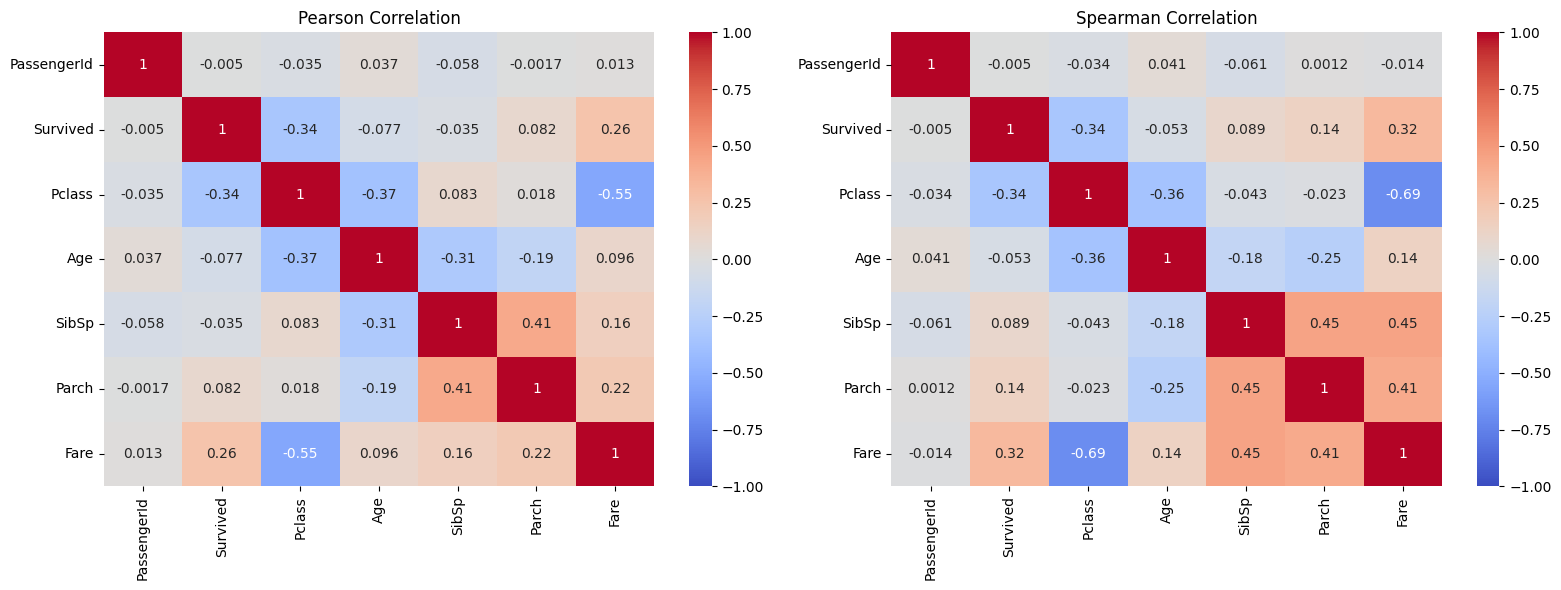

In [27]:
# 피어슨 상관관계
pearson_corr = train_df.corr(method='pearson', numeric_only=True)
spearman_corr = train_df.corr(method='spearman', numeric_only=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Pearson Correlation')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Spearman Correlation')
plt.tight_layout()
plt.show()

In [ ]:
# 실제로 훈련에 사용할 데이터프레임 생성
df = train_df.copy()
print(df)

In [11]:
print(f"생존자 수: {sum(df['Survived'])}, 사망자 수: {891 - sum(df['Survived'])}")

생존자 수: 342, 사망자 수: 549


In [12]:
num_males = df[df["Sex"] == "male"].shape[0]
num_females = df[df["Sex"] == "female"].shape[0]
print(f'남자: {num_males}, 여자: {num_females}')

남자: 577, 여자: 314


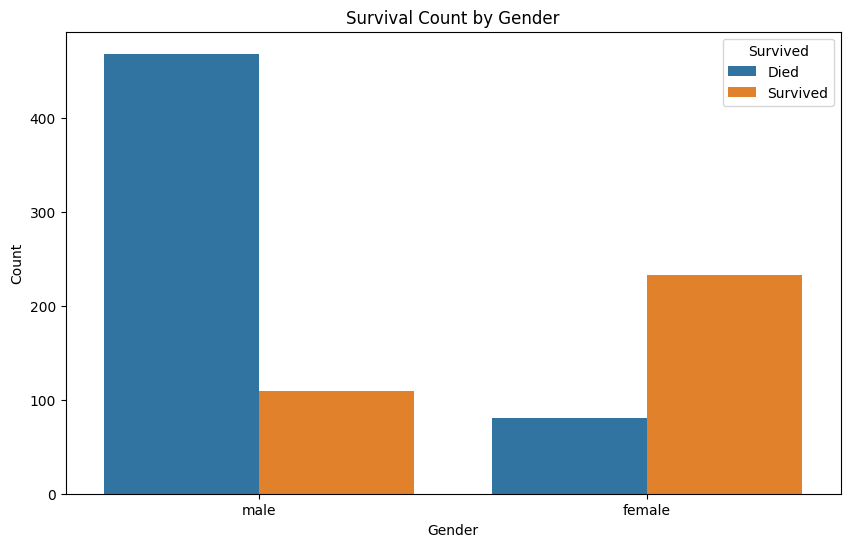

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Died", "Survived"])
plt.show()

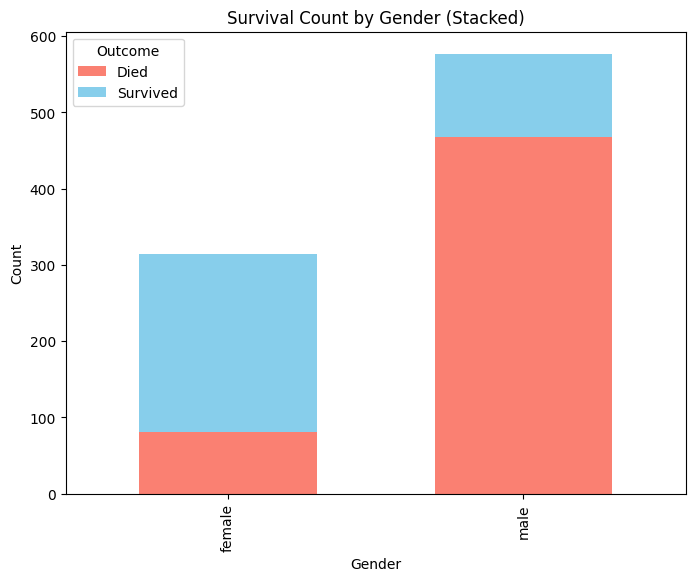

In [14]:
survival_counts = df.groupby(["Sex", "Survived"]).size().unstack()

survival_counts.plot(kind="bar", stacked=True, color=["salmon", "skyblue"], figsize=(8, 6), width=0.6)
plt.title("Survival Count by Gender (Stacked)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Died", "Survived"], title="Outcome")
plt.show()

C:\Users\ty\AppData\Local\Temp\ipykernel_101408\3248653176.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Pclass", y="Fare", palette="viridis", ax=axes[1])


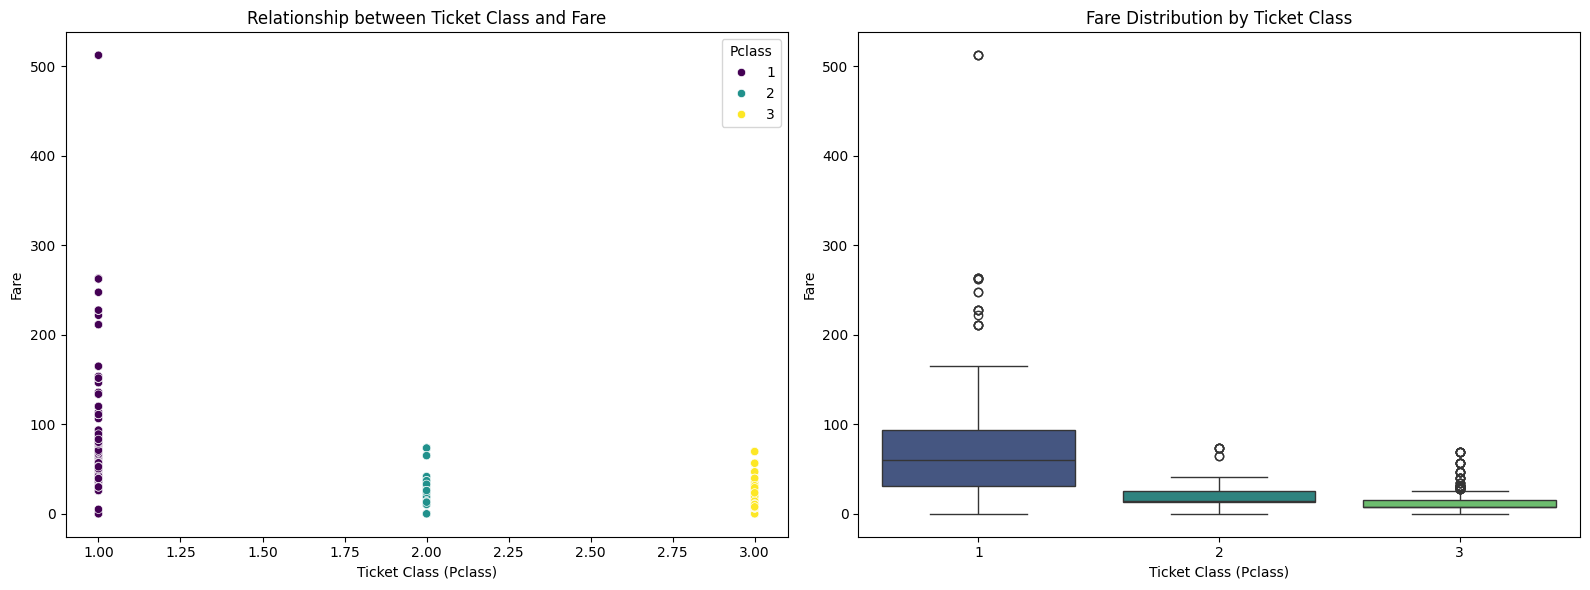

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 산점도 (Scatterplot)
sns.scatterplot(data=df, x="Pclass", y="Fare", hue="Pclass", palette="viridis", ax=axes[0])
axes[0].set_title("Relationship between Ticket Class and Fare")
axes[0].set_xlabel("Ticket Class (Pclass)")
axes[0].set_ylabel("Fare")

# 박스플롯 (Boxplot)
sns.boxplot(data=df, x="Pclass", y="Fare", palette="viridis", ax=axes[1])
axes[1].set_title("Fare Distribution by Ticket Class")
axes[1].set_xlabel("Ticket Class (Pclass)")
axes[1].set_ylabel("Fare")

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

C:\Users\ty\AppData\Local\Temp\ipykernel_101408\119581034.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Embarked", y="Fare", estimator="mean", ci=None, palette="viridis")
C:\Users\ty\AppData\Local\Temp\ipykernel_101408\119581034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Embarked", y="Fare", estimator="mean", ci=None, palette="viridis")


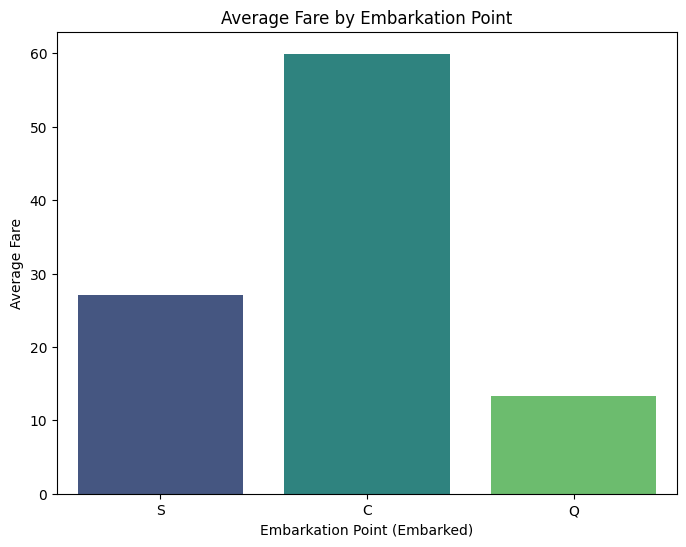

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Embarked", y="Fare", estimator="mean", ci=None, palette="viridis")
plt.title("Average Fare by Embarkation Point")
plt.xlabel("Embarkation Point (Embarked)")
plt.ylabel("Average Fare")
plt.show()

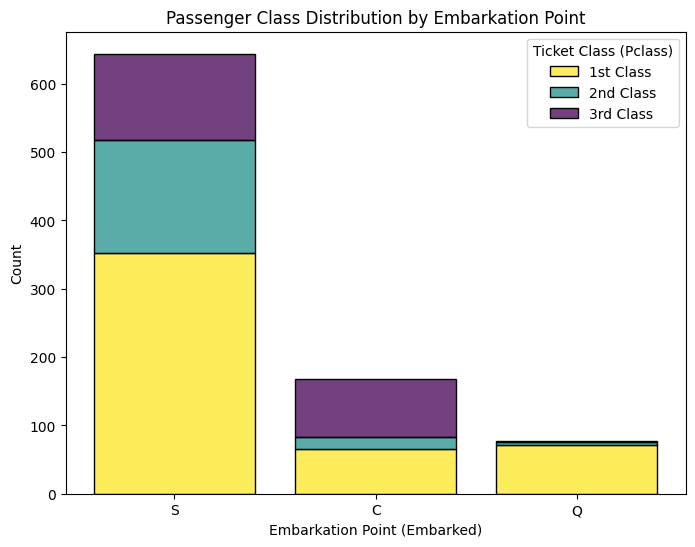

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Embarked", hue="Pclass", multiple="stack", palette="viridis", shrink=0.8)
plt.title("Passenger Class Distribution by Embarkation Point")
plt.xlabel("Embarkation Point (Embarked)")
plt.ylabel("Count")
plt.legend(title="Ticket Class (Pclass)", labels=["1st Class", "2nd Class", "3rd Class"])
plt.show()

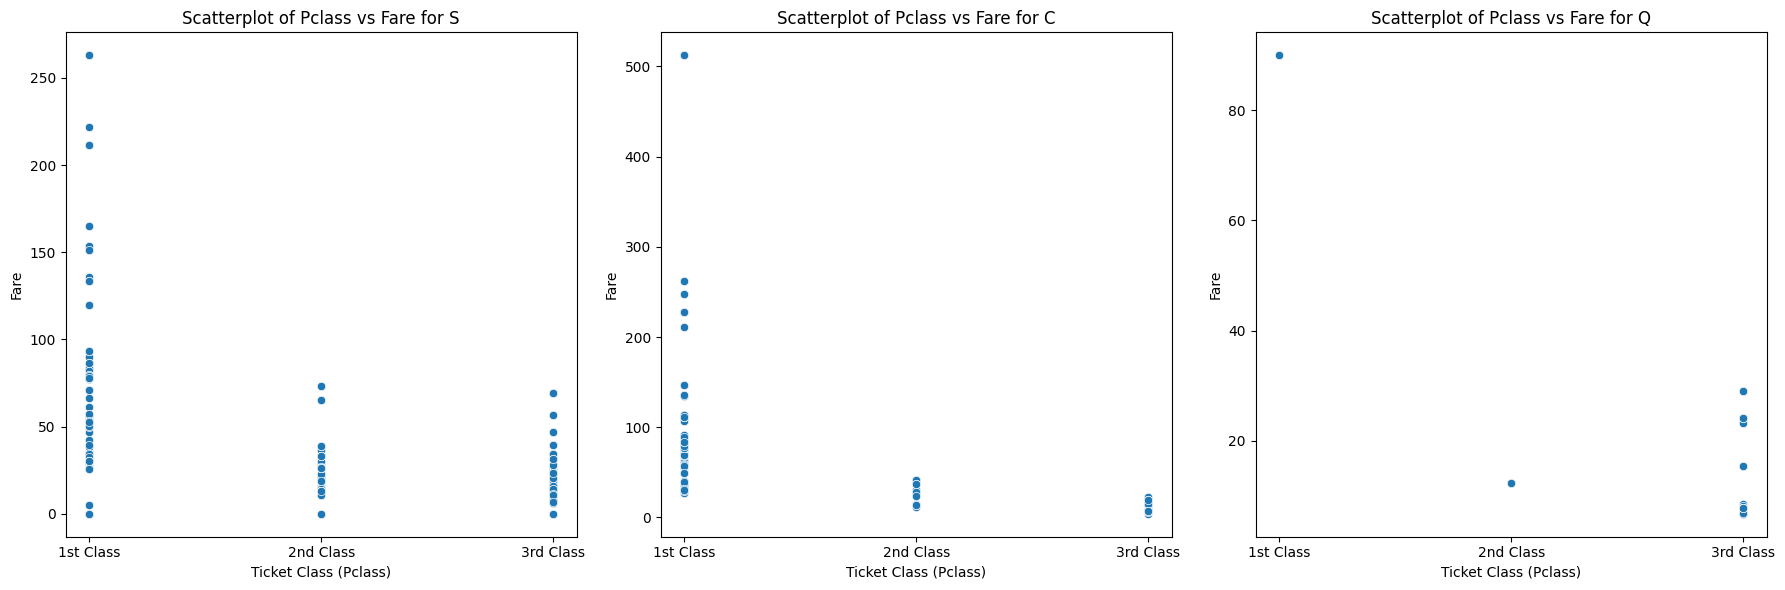

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 기항지 리스트
embarked_ports = df["Embarked"].unique()

# 각 기항지에 대해 산점도 그리기
for i, port in enumerate(embarked_ports[:3]):
    sns.scatterplot(data=df[df["Embarked"] == port], 
                    x="Pclass", 
                    y="Fare", 
                    ax=axes[i])
    axes[i].set_title(f"Scatterplot of Pclass vs Fare for {port}")
    axes[i].set_xlabel("Ticket Class (Pclass)")
    axes[i].set_ylabel("Fare")
    axes[i].set_xticks([1, 2, 3])  # X축 ticks 설정
    axes[i].set_xticklabels(["1st Class", "2nd Class", "3rd Class"])

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

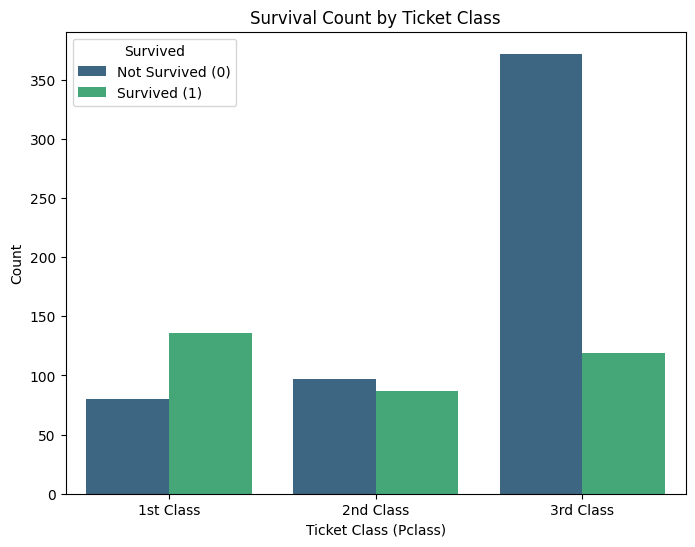

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="viridis")
plt.title("Survival Count by Ticket Class")
plt.xlabel("Ticket Class (Pclass)")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])  # X축 레이블 변경
plt.legend(title="Survived", labels=["Not Survived (0)", "Survived (1)"])
plt.show()

C:\Users\ty\AppData\Local\Temp\ipykernel_101408\782233556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Survived", y="Fare", palette="viridis")


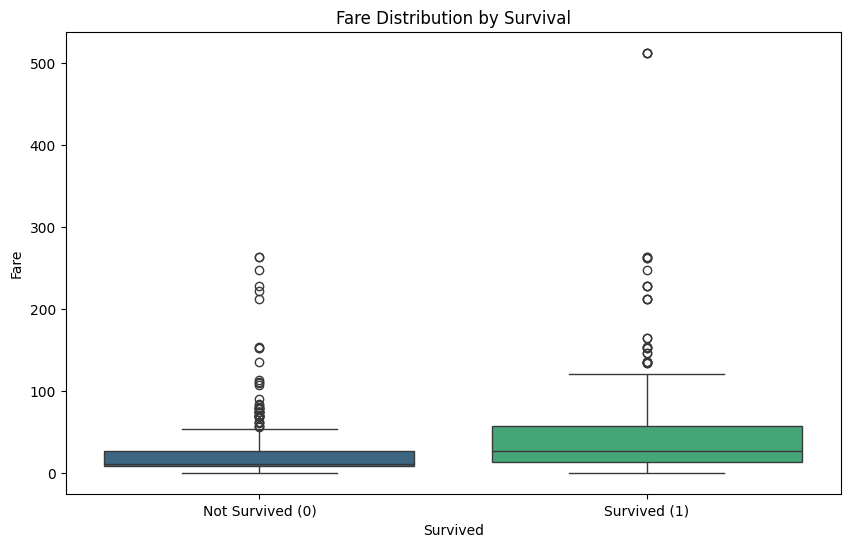

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Survived", y="Fare", palette="viridis")
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks([0, 1], ['Not Survived (0)', 'Survived (1)'])
plt.show()

### 테스트 데이터 분석

In [21]:
test_df = pd.read_csv("./data/test.csv")
print(test_df)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 